<a href="https://colab.research.google.com/github/catafest/colab_google/blob/master/Copy_of_catafest_007.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This is a test on colab with example form this link:
 https://github.com/harrism/numba_examples/blob/master/mandelbrot_numba.ipynb

I change the source code to work with the new version of numba.
```
# This is old sourcce code and not work here
from numba import autojit
@autojit
```



In [ ]:
!pip install numba

Mandelbrot created in 0.423015 s


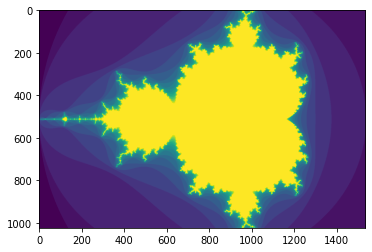

In [ ]:
import numba
from numba import jit

@jit
def mandel(x, y, max_iters):
  """
    Given the real and imaginary parts of a complex number,
    determine if it is a candidate for membership in the Mandelbrot
    set given a fixed number of iterations.
  """
  c = complex(x, y)
  z = 0.0j
  for i in range(max_iters):
    z = z*z + c
    if (z.real*z.real + z.imag*z.imag) >= 4:
      return i

  return max_iters

@jit
def create_fractal(min_x, max_x, min_y, max_y, image, iters):
  height = image.shape[0]
  width = image.shape[1]

  pixel_size_x = (max_x - min_x) / width
  pixel_size_y = (max_y - min_y) / height
    
  for x in range(width):
    real = min_x + x * pixel_size_x
    for y in range(height):
      imag = min_y + y * pixel_size_y
      color = mandel(real, imag, iters)
      image[y, x] = color

image = np.zeros((1024, 1536), dtype = np.uint8)
start = timer()
create_fractal(-2.0, 1.0, -1.0, 1.0, image, 20) 
dt = timer() - start

print ("Mandelbrot created in %f s" % dt)
imshow(image)
show()      